# 使用窗函数设计FIR高通滤波器

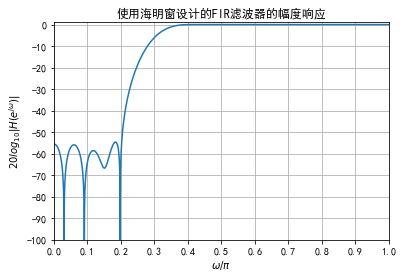

In [1]:
#导入使用的库
import numpy as np;from math import *
from scipy import signal,fft
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

#滤波器参数
wp = 0.4*pi;ws = 0.2*pi; #通带和阻带截止频率
wc = (wp+ws)/2;Bt = np.abs(wp-ws) #截止频率和过渡带宽

#由阻带衰减As = 40，可以确定窗形状为海明窗
N = np.ceil((6.6*pi)/Bt)+1;N = int(N+(N+1)%2)#滤波器长度点数（取奇数）
wn = signal.windows.hamming(N) #海明窗的wn值

#理想低通滤波器的单位取样响应
t = int((N-1)/2)
n1 = np.arange(N);n1 = np.delete(n1,t)
hd = -np.sin(wc*(n1-t))/(pi*(n1-t))
hd = np.insert(hd,t,(1-wc/pi))

#线性相位FIR滤波器
h = hd*wn;N0 = N*1000
He = np.abs(fft.fft(h,N0));He = He/np.max(He)
Ar = 20*np.log10(He);N1 = int(N0/2)
f = np.linspace(0,1,N1)

#绘制滤波器的幅度响应
fig,ax = plt.subplots();ax.plot(f,Ar[:N1]);ax.grid()
ax.set_title('使用海明窗设计的FIR滤波器的幅度响应');ax.set_xlabel('k')
ax.set_xlabel(r'$ \omega / \pi $')
ax.set_ylabel(r'$ 20log_{10}| H (e^{j \omega}) | $')
ax.set_xlim([0,1]);ax.set_ylim([-100,1])
ax.xaxis.set_major_locator(MaxNLocator(11))
ax.yaxis.set_major_locator(MaxNLocator(11))
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False #用来显示负号
fig.savefig('./fir_window1.png',dpi=500)
